<a href="https://colab.research.google.com/github/sidhu2690/GEANT4/blob/main/01_HGCAL_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of placed cells: 952


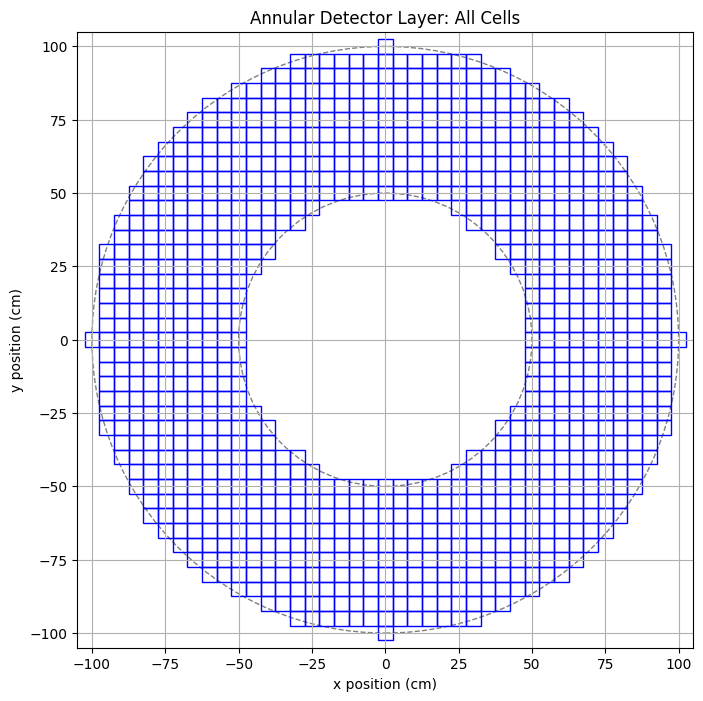

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------
# Parameters
# ---------------------
cellSize = 5.0          # cm
innerRadius = 50.0       # cm
outerRadius = 100.0      # cm

numCellsAlongRadius = int(outerRadius / cellSize)

# ---------------------
# Generate all pixel centers
# ---------------------
positions = []
for ix in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
    for iy in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
        xPos = ix * cellSize
        yPos = iy * cellSize
        r = math.sqrt(xPos**2 + yPos**2)
        if innerRadius <= r <= outerRadius:
            positions.append((xPos, yPos))

positions = np.array(positions)
xs_all = positions[:,0]
ys_all = positions[:,1]
total_cells = len(xs_all)
print(f"Total number of placed cells: {total_cells}")

# ---------------------
# Plot all cells
# ---------------------
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_ylim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_title("Annular Detector Layer: All Cells")
ax.set_xlabel("x position (cm)")
ax.set_ylabel("y position (cm)")
ax.grid(True)

# Draw annulus outlines
circle_outer = plt.Circle((0,0), outerRadius, fill=False, linestyle='--', color='gray')
circle_inner = plt.Circle((0,0), innerRadius, fill=False, linestyle='--', color='gray')
ax.add_patch(circle_outer)
ax.add_patch(circle_inner)

# Draw rectangles
for xc, yc in positions:
    rect = plt.Rectangle((xc - cellSize/2, yc - cellSize/2),
                         cellSize, cellSize,
                         edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.show()


Total detector cells: 952
Cell size: 5.0 cm
Detector region: 50.0-100.0 cm radius
Number of hits generated: 100
--------------------------------------------------
Accuracy: 100/100 = 100.0%


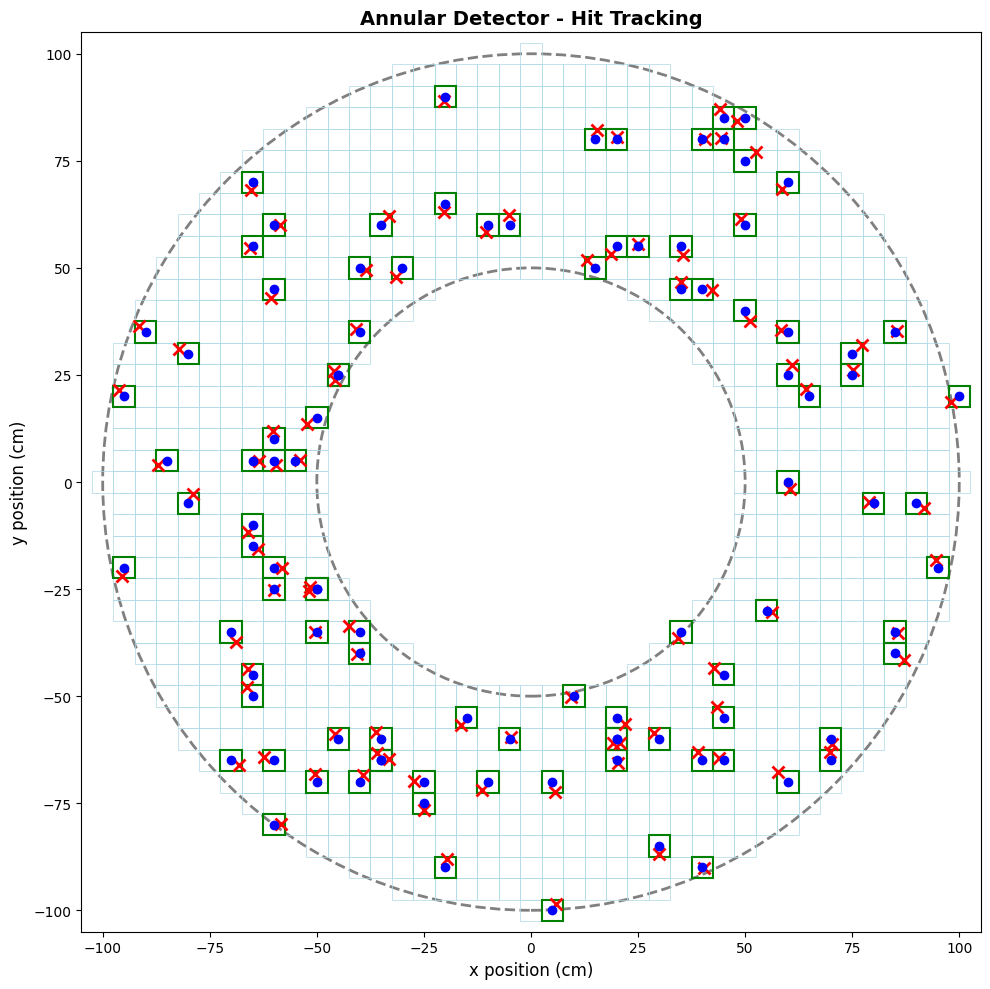

In [87]:
numCellsAlongRadius = int(outerRadius / cellSize)

# Generate all pixel centers
positions = []
for ix in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
    for iy in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
        xPos = ix * cellSize
        yPos = iy * cellSize
        r = math.sqrt(xPos**2 + yPos**2)
        if innerRadius <= r <= outerRadius:
            positions.append((xPos, yPos))

positions = np.array(positions)
print(f'Total detector cells: {len(positions)}')
print(f'Cell size: {cellSize} cm')
print(f'Detector region: {innerRadius}-{outerRadius} cm radius')
print(f'Number of hits generated: {num_hits}')
print('-' * 50)

# Generate random hits
num_hits = 100
hit_positions = []

for _ in range(num_hits):
    r_hit = np.random.uniform(innerRadius, outerRadius)
    theta_hit = np.random.uniform(0, 2 * np.pi)
    x_hit = r_hit * np.cos(theta_hit)
    y_hit = r_hit * np.sin(theta_hit)
    hit_positions.append((x_hit, y_hit))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_ylim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_title("Annular Detector - Hit Tracking", fontsize=14, fontweight='bold')
ax.set_xlabel("x position (cm)", fontsize=12)
ax.set_ylabel("y position (cm)", fontsize=12)

# Draw annulus outlines
circle_outer = plt.Circle((0,0), outerRadius, fill=False, linestyle='--',
                         color='gray', linewidth=2)
circle_inner = plt.Circle((0,0), innerRadius, fill=False, linestyle='--',
                         color='gray', linewidth=2)
ax.add_patch(circle_outer)
ax.add_patch(circle_inner)

# Draw all cells
for xc, yc in positions:
    rect = plt.Rectangle((xc - cellSize/2, yc - cellSize/2),
                         cellSize, cellSize,
                         edgecolor='lightblue', facecolor='none',
                         linewidth=0.5)
    ax.add_patch(rect)

# Draw hits and predicted squares
hits_inside = 0
total_hits = len(hit_positions)

for x_hit, y_hit in hit_positions:
    # Calculate pixel indices
    i = round(x_hit / cellSize)
    j = round(y_hit / cellSize)

    # Calculate pixel center
    x_center = i * cellSize
    y_center = j * cellSize

    # Check if hit is inside the predicted box
    half_cell = cellSize / 2
    inside_box = (abs(x_hit - x_center) <= half_cell and
                  abs(y_hit - y_center) <= half_cell)

    if inside_box:
        hits_inside += 1

    # Draw hit as cross
    ax.plot(x_hit, y_hit, 'x', color='red', markersize=8, markeredgewidth=2)

    # Draw pixel center as blue dot
    ax.plot(x_center, y_center, 'o', color='blue', markersize=6)

    # Draw predicted square
    rect = plt.Rectangle((x_center - cellSize/2, y_center - cellSize/2),
                         cellSize, cellSize,
                         edgecolor='green', facecolor='none', linewidth=1.5)
    ax.add_patch(rect)

accuracy = (hits_inside / total_hits) * 100
print(f'Accuracy: {hits_inside}/{total_hits} = {accuracy:.1f}%')

plt.tight_layout()
plt.show()